[View in Colaboratory](https://colab.research.google.com/github/avs20/HOG_Playground/blob/master/Dog_Breed_Classifier.ipynb)

### Things to install 

1. OpenCV
2. Face Detector Model for opencv
2. Download Dataset to google drive 


In [1]:
!ls

dogImages			 lfw	   sample_data	wget-log.2
dogImages.zip			 lfw.zip   wget-log
haarcascade_frontalface_alt.xml  __MACOSX  wget-log.1


In [0]:
#install opencv 
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [13]:
!wget https://raw.githubusercontent.com/udacity/dog-project/master/haarcascades/haarcascade_frontalface_alt.xml



Redirecting output to ‘wget-log.1’.


In [14]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip


Redirecting output to ‘wget-log.2’.


dogImages      haarcascade_frontalface_alt.xml	sample_data  wget-log.1
dogImages.zip  lfw.zip				wget-log     wget-log.2


In [3]:
!unzip lfw.zip -d ./

Archive:  lfw.zip
replace ./lfw/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./lfw/.DS_Store         
  inflating: ./__MACOSX/lfw/._.DS_Store  
  inflating: ./lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
  inflating: ./__MACOSX/lfw/Aaron_Eckhart/._Aaron_Eckhart_0001.jpg  
  inflating: ./__MACOSX/lfw/._Aaron_Eckhart  
  inflating: ./lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg  
  inflating: ./__MACOSX/lfw/Aaron_Guiel/._Aaron_Guiel_0001.jpg  
  inflating: ./__MACOSX/lfw/._Aaron_Guiel  
  inflating: ./lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg  
  inflating: ./__MACOSX/lfw/Aaron_Patterson/._Aaron_Patterson_0001.jpg  
  inflating: ./__MACOSX/lfw/._Aaron_Patterson  
  inflating: ./lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg  
  inflating: ./__MACOSX/lfw/Aaron_Peirsol/._Aaron_Peirsol_0001.jpg  
  inflating: ./lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg  
  inflating: ./__MACOSX/lfw/Aaron_Peirsol/._Aaron_Peirsol_0002.jpg  
  inflating: ./lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg  
  infl

In [4]:
!ls lfw

Aaron_Eckhart			 Joshua_Harapko
Aaron_Guiel			 Joshua_Perper
Aaron_Patterson			 Joxel_Garcia
Aaron_Peirsol			 Joy_Bryant
Aaron_Pena			 Joy_Lee_Sadler
Aaron_Sorkin			 JP_Suarez
Aaron_Tippin			 JT_Snow
Abba_Eban			 Juan_Antonio_Samaranch
Abbas_Kiarostami		 Juan_Carlos
Abdel_Aziz_Al-Hakim		 Juan_Carlos_Ferrero
Abdel_Madi_Shabneh		 Juan_Carlos_Morales
Abdel_Nasser_Assidi		 Juan_Carlos_Ortega
Abdoulaye_Wade			 Juanes
Abdulaziz_Kamilov		 Juan_Fernandez
Abdullah			 Juan_Francisco_Palencia
Abdullah_Ahmad_Badawi		 Juan_Ignacio_Chela
Abdullah_al-Attiyah		 Juan_Jose_Lucas
Abdullah_Gul			 Juan_Manuel_Marquez
Abdullah_Nasseef		 Juan_Pablo_Montoya
Abdullatif_Sener		 Juan_Roman_Carrasco
Abdul_Majeed_Shobokshi		 Juan_Roman_Riquelme
Abdul_Rahman			 Juan_Sanchez
Abel_Aguilar			 Juan_Valencia_Osorio
Abel_Pacheco			 Judd_Davies
Abid_Hamid_Mahmud_Al-Tikriti	 Jude_Law
Abner_Martinez			 Judi_Dench
Abraham_Foxman			 Judi_Patton
Aby_Har-Even			 Judith_Nathan
Adam_Ant			 Judy_Dean
Adam_Freier			 Judy_Genshaft
A

In [5]:
import random
import numpy as np 
from glob import glob
random.seed(2403)

# load filenames in shuffled human dataset
human_files = np.array(glob("lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))


There are 13233 total human images.


The code below is based on [Haar Cascade Detection in Opencv](https://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)

This is basically object detection which we discussed in the class using Histogram of Oriented Gradients . 



Number of faces detected: 1


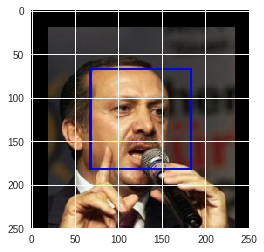

In [6]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[1])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [8]:

# returns "True" if face is detected in image stored at img_path# retur 
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0
  

human_files_shorthuman_f  = human_files[:100]

human_count = 0

for human_file in human_files_shorthuman_f:
  face = face_detector(human_file)
  if face:
    human_count += 1
 
print(human_count)
 

99


# Import Datsets

In [1]:
# #Dog images 
# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip


Redirecting output to ‘wget-log’.


In [5]:
!ls 

dogImages  dogImages.zip  sample_data  wget-log


In [10]:
!ls ./dogImages

dogImages


In [6]:

# !unzip dogImages.zip -d ./dogImages

Archive:  dogImages.zip
   creating: ./dogImages/dogImages/
   creating: ./dogImages/dogImages/test/
   creating: ./dogImages/dogImages/train/
   creating: ./dogImages/dogImages/valid/
   creating: ./dogImages/dogImages/test/001.Affenpinscher/
  inflating: ./dogImages/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: ./dogImages/dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: ./dogImages/dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: ./dogImages/dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg  
  inflating: ./dogImages/dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg  
  inflating: ./dogImages/dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg  
  inflating: ./dogImages/dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg  
  inflating: ./dogImages/dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg  
   creating: ./dogImages/dogImages/test/002.Afghan_hound/
  inflating: ./dogImages/d

In [10]:
# Check loaded data 

from  sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('./dogImages/dogImages/train')
valid_files, valid_targets = load_dataset('./dogImages/dogImages/valid')
test_files, test_targets = load_dataset('./dogImages/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("./dogImages/dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [11]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_count = 0
for human_file in human_files_short:
    if face_detector(human_file):
        human_count += 1

dog_count = 0
for dog_file in dog_files_short:
    if face_detector(dog_file):
        dog_count += 1
        
print('{:.1%} of the first 100 human images have a detected human face.'.format(human_count / len(human_files_short)))
print('{:.1%} of the first 100 dog images have a detected human face.'.format(dog_count / len(dog_files_short)))

99.0% of the first 100 human images have a detected human face.
12.0% of the first 100 dog images have a detected human face.


# Detect Dogs

In [13]:
#import model
from  keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 4s 0us/step


Load the data as per requirement


In [0]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

New Dog Detector

In [0]:

from  keras.applications.resnet50  import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))
  
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

Test Detector


In [18]:
human_count = 0
for human_file in human_files_short:
    if dog_detector(human_file):
        human_count += 1

dog_count = 0
for dog_file in dog_files_short:
    if dog_detector(dog_file):
        dog_count += 1
        
print('{:.1%} of the first 100 human images have a detected dog.'.format(human_count / len(human_files_short)))
print('{:.1%} of the first 100 dog images have a detected dog.'.format(dog_count / len(dog_files_short)))

0.0% of the first 100 human images have a detected dog.
100.0% of the first 100 dog images have a detected dog.


# Creating a CNN from Scratch



### Preprocess the data

In [19]:

from  PIL  import  ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:08<00:00, 103.84it/s]


### Model Architecture

![alt text](https://github.com/mspbannister/mlnd-p5-dogbreedclassifier/raw/a810217104b4404e8eeb91a1d3771be4e2d2c671/images/sample_cnn.png)

In [20]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=train_tensors.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(133, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
__________

### Model compilation

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the model

In [0]:
!mkdir saved_models

In [24]:
from keras.callbacks import ModelCheckpoint  

# the number of epochs that you would like to use to train the model.

epochs = 5



checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
6680/6680 [==============================] - 25s 4ms/step - loss: 4.3500 - acc: 0.0567 - val_loss: 4.2602 - val_acc: 0.0659

Epoch 00001: val_loss improved from inf to 4.26018, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 2/5
6680/6680 [==============================] - 24s 4ms/step - loss: 3.8845 - acc: 0.1238 - val_loss: 4.1142 - val_acc: 0.0826

Epoch 00002: val_loss improved from 4.26018 to 4.11415, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 3/5
6680/6680 [==============================] - 24s 4ms/step - loss: 3.1759 - acc: 0.2455 - val_loss: 4.3100 - val_acc: 0.0910

Epoch 00003: val_loss did not improve from 4.11415
Epoch 4/5
6680/6680 [==============================] - 24s 4ms/step - loss: 2.1629 - acc: 0.4668 - val_loss: 4.5556 - val_acc: 0.0922

Epoch 00004: val_loss did not improve from 4.11415
Epoch 5/5
6680/6680 [==============================] - 24s 4ms/step - loss: 1.2764 

### Testing Accuracy

In [25]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 9.5694%


## Can we do better?

Yes, Stand on the shoulders of giants

Use a better CNN model

In [37]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG16Data.npz


Redirecting output to ‘wget-log.5’.


In [0]:
!mv DogVGG16Data.npz ./bottleneck_features/DogVGG16Data.npz 

In [0]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

In [40]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile and Training

In [41]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 3s 387us/step - loss: 11.5776 - acc: 0.1347 - val_loss: 9.4729 - val_acc: 0.2491

Epoch 00001: val_loss improved from inf to 9.47287, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 2/20
6680/6680 [==============================] - 2s 287us/step - loss: 8.6478 - acc: 0.3392 - val_loss: 8.5781 - val_acc: 0.3605

Epoch 00002: val_loss improved from 9.47287 to 8.57806, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 3/20
6680/6680 [==============================] - 2s 288us/step - loss: 8.0589 - acc: 0.4210 - val_loss: 8.3393 - val_acc: 0.3772

Epoch 00003: val_loss improved from 8.57806 to 8.33928, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 4/20
6680/6680 [==============================] - 2s 289us/step - loss: 7.8133 - acc: 0.4549 - val_loss: 8.1863 - val_acc: 0.4012

Epoch 00004: val_loss improved from 8.33928 to 8.18634, saving model to saved_mod

### Test and check accuracy

In [0]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

In [43]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 49.8804%


Woah, we are at 50%. 


We can do better with more complex model like Resnet and Exception which can take us to 85% accuracy. 

